In [1]:
# %pip install --upgrade plotly

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.sort_values('year')

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA


In [8]:
df_data.year.max()

2020

In [9]:
df_data[df_data.duplicated(keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO


In [10]:
df_data.duplicated().values.any()

False

In [11]:
df_data.isna().values.any()

True

In [12]:
# Columns about birthplace and organization tend to have NA

In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
df_data.isna().sum().sum()

1023

In [15]:
#These columns tend to have na values because ter may be no records of their place or origin and perhaps they are not part of a larger organization with their work.

In [16]:
df_data['birth_date'] = pd.to_datetime(df_data.birth_date)

In [17]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Percentage of Male vs. Female Laureates

In [19]:
biology = df_data.sex.value_counts()
figure = px.pie(labels=biology.index,
                values=biology.values,
                title='Percentage of prizes awarded to men vs women',
                names=biology.index,
                hole=0.4)
figure.show()

C:\Users\Michael\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



#  First 3 Women to Win the Nobel Prize

In [20]:

first_females = df_data[['year', 'sex',
                         'full_name', 'birth_country',
                         'category', 'organization_name']].sort_values(by=['sex', 'year'], ascending=True)
first_females[:3]

,year,sex,full_name,birth_country,category,organization_name
18,1903,Female,"Marie Curie, née Sklodowska",Russian Empire (Poland),Physics,NaN
29,1905,Female,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic),Peace,NaN
51,1909,Female,Selma Ottilia Lovisa Lagerlöf,Sweden,Literature,NaN


# Repeat Winners


In [21]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are 6 winners who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category


In [22]:
 counts = df_data[['year', 'category']].groupby('category').count()

In [23]:
df_data.category.nunique()

6

In [24]:
prizes_per_category = df_data.category.value_counts()
fig = px.bar(x=prizes_per_category.index,
            y=prizes_per_category.values,
            color = prizes_per_category.values,
            color_continuous_scale='Aggrnyl',
            title='Number of Nobel Prizes by Category')

fig.update_layout(coloraxis_showscale=False,
                 xaxis_title='Nobel Prize Category',
                 yaxis_title='Number of Prizes')

fig.show()

In [25]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


In [26]:
men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
print(men_women)

      category     sex  prize
0    Chemistry  Female      7
1    Chemistry    Male    179
2    Economics  Female      2
3    Economics    Male     84
4   Literature  Female     16
5   Literature    Male    101
6     Medicine  Female     12
7     Medicine    Male    210
8        Peace  Female     17
9        Peace    Male     90
10     Physics  Female      4
11     Physics    Male    212


In [27]:
men_women.sort_values('prize', ascending=False, inplace=True)

In [28]:
v_bar_split = px.bar(x = men_women.category,
                     y = men_women.prize,
                     color = men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Number of Prizes Awarded Over Time


In [29]:
# rolling_prize = prizes.rolling(5)

In [30]:
# years_by_five = np.array(df_data.year)
# year_list = []
# for n in years_by_five:
#     if 0 == n%5:
#         year_list.append(n)
# df_year = pd.DataFrame(year_list)
# df_year.columns = ['year']
# df_year = df_year.year.unique()
# df_year.shape

In [31]:
prize_per_year = df_data.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()

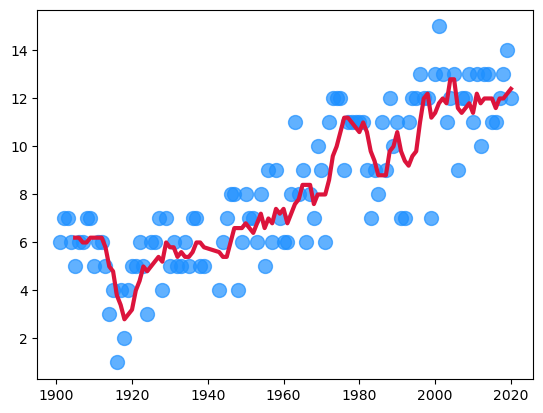

In [32]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

 
plt.show()

# Are More Prizes Shared Than Before?


In [33]:
df_prize_share = pd.DataFrame(df_data[['year', 'share_pct']])
df_prize_share.groupby('year', as_index=False, axis=0).share_pct.mean()

,year,share_pct
0,1901,0.83
1,1902,0.71
2,1903,0.71
3,1904,0.83
4,1905,1.00
...,...,...
112,2016,0.55
113,2017,0.50
114,2018,0.46
115,2019,0.43


In [34]:
moving_shares = df_prize_share.share_pct.rolling(window=5).mean()

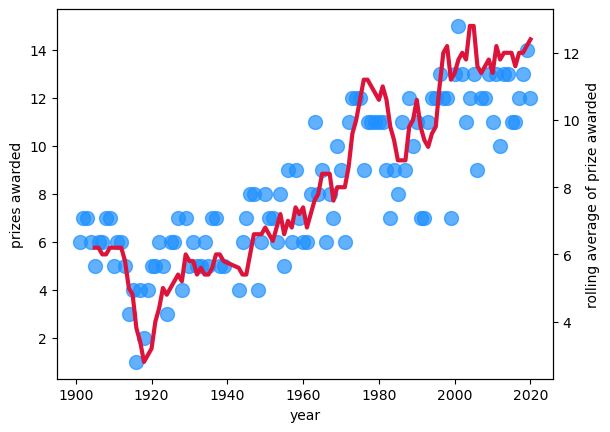

In [35]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('year')
ax1.set_ylabel('prizes awarded')
ax2.set_ylabel('rolling average of prize awarded')

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax2.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

 
plt.show()

# The Countries with the Most Nobel Prizes

In [36]:
# df_top_20 = df_data[['birth_country', 'prize']].groupby('birth_country', as_index=False).count()
# top20_countires = pd.DataFrame(df_top_20)

In [37]:
df_top_20 = df_data[['birth_country_current', 'prize', 'ISO']].groupby(['birth_country_current', 'ISO'], as_index=False).count()
top20_countires = pd.DataFrame(df_top_20)
top20_countries = top20_countires.sort_values('prize', ascending=False).head(20)
top20_countries

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
40,Japan,JPN,27
57,Poland,POL,27
61,Russia,RUS,26
11,Canada,CAN,20
68,Switzerland,CHE,19


In [38]:
fig = px.bar(top20_countries, x='prize',
             y='birth_country_current',
             orientation='h',
            title='Top 20 Prize Winning Countries',
            hover_data=['prize'],
            color_continuous_scale='matter',
            color='prize')

fig.update_layout(yaxis=dict(autorange='reversed'),
                 yaxis_title='birth_country_current',
                 xaxis_title='Prize(s)',
                 )

fig.show()

# Number of Prizes Won by Country


In [39]:
top20_countries = top20_countires.sort_values('prize', ascending=False)

fig = px.choropleth(top20_countries,
                   color='prize',
                   locations='ISO',
                   hover_name='birth_country_current',
                   color_continuous_scale='matter')
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 


In [40]:
cat_count_prize = df_data.groupby(['birth_country_current', 'category'],
                        as_index=False).agg({'prize':pd.Series.count})

In [41]:
cat_count_prize.sort_values(by='prize', ascending=False, inplace=True)

In [42]:
top20_countries = top20_countires.sort_values('prize', ascending=False).head(20)
merged_df = pd.merge(cat_count_prize, top20_countries, on='birth_country_current')

In [43]:
merged_df.columns = ['birth_country_current', 'category', 'cat_count_prize', 'ISO', 'total_prize']

In [44]:
merged_df.sort_values('total_prize', inplace=True)

In [45]:
cat_count_bar = px.bar(merged_df,
                      x='cat_count_prize',
                      y='birth_country_current',
                      color='category',
                      color_continuous_scale='matter',
                      orientation='h',
                      title='Top 20 Countries by Number of Prizes and Category')

cat_count_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')

cat_count_bar.show()

# Number of Prizes Won by Each Country Over Time


In [46]:

time_df = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
time_df = time_df.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [47]:
cumulative_prizes = time_df.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [48]:
line = px.line(cumulative_prizes,
              x='year',
              y='prize',
              color='birth_country_current',
              title='Number of Prizes Won by Each Country Over Time')

line.show()

# What are the Top Research Organisations?


In [49]:
top20_orgs = df_data.groupby('organization_name',
                as_index=False).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False).head(20)

In [50]:
fig = px.bar(top20_orgs,
            x='prize',
            y='organization_name',
            orientation='h',
            color='prize',
            color_continuous_scale='haline',
            title='Top 20 Research Institutions by Number of Prizes')

fig.update_layout(yaxis=dict(autorange='reversed'),
                 yaxis_title='Institution',
                 xaxis_title='Number of Prizes',
                 )

fig.update_coloraxes(showscale=False)

fig.show()

The top instituions are American University Organizations which is in line with the United States having the most prizes won in recent years.

# Which Cities Make the Most Discoveries? 


In [51]:
top20_cities = df_data.groupby('organization_city',
                as_index=False).agg({'prize':pd.Series.count}).sort_values('prize',ascending=False).head(20)

In [52]:
fig = px.bar(top20_cities,
            x='prize',
            y='organization_city',
            color='prize',
            title='Top 20 Cities Associated with Prize Winning Organizations',
            orientation='h',
            color_continuous_scale='Brwnyl')

fig.update_layout(yaxis_title='Cities',
                 xaxis_title='Number of Prizes',
                 yaxis=dict(autorange='reversed'))

fig.show()

# Where are Nobel Laureates Born?


In [53]:
top20_birth_cities = df_data.groupby('birth_city',
                                     as_index=False).agg({'full_name':pd.Series.count}).sort_values('full_name', ascending=False)
top20_birth_cities = top20_birth_cities[:20]

In [54]:
fig = px.bar(top20_birth_cities,
            x='full_name',
            y='birth_city',
            title='Top 20 Cities of Nobel Laureates',
            color='full_name',
            color_continuous_scale='Plasma',
            orientation='h')

fig.update_layout(yaxis_title='Cities',
                 xaxis_title='Number of Laureates',
                 yaxis=dict(autorange='reversed'))

fig.update_coloraxes(showscale=False)

fig.show()

    55% of Laureates came from New York alone

# Sunburst Chart

In [61]:
sunburst = df_data.groupby(['organization_country',
                 'organization_city',
                 'organization_name'], as_index=False).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False)
sunburst[:10]

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
163,United Kingdom,Cambridge,University of Cambridge,18
248,United States of America,"New York, NY",Columbia University,17
255,United States of America,"Pasadena, CA",California Institute of Technology (Caltech),17
260,United States of America,"Princeton, NJ",Princeton University,15
252,United States of America,"New York, NY",Rockefeller University,13


In [56]:
fig = px.sunburst(
    data_frame=sunburst,
    path=['organization_country','organization_city','organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?')

fig.show()

# Patterns in the Laureate Age at the Time of the Award



In [57]:
birth_years = df_data.birth_date.dt.year

In [58]:
df_data['winning_age'] = df_data.year - birth_years

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [59]:
display(df_data.nlargest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


In [60]:
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [62]:
df_data.winning_age.mean()

59.94860813704497

In [72]:
df_data.winning_age.quantile(0.75)

69.0

### Descriptive Statistics for the Laureate Age at Time of Award

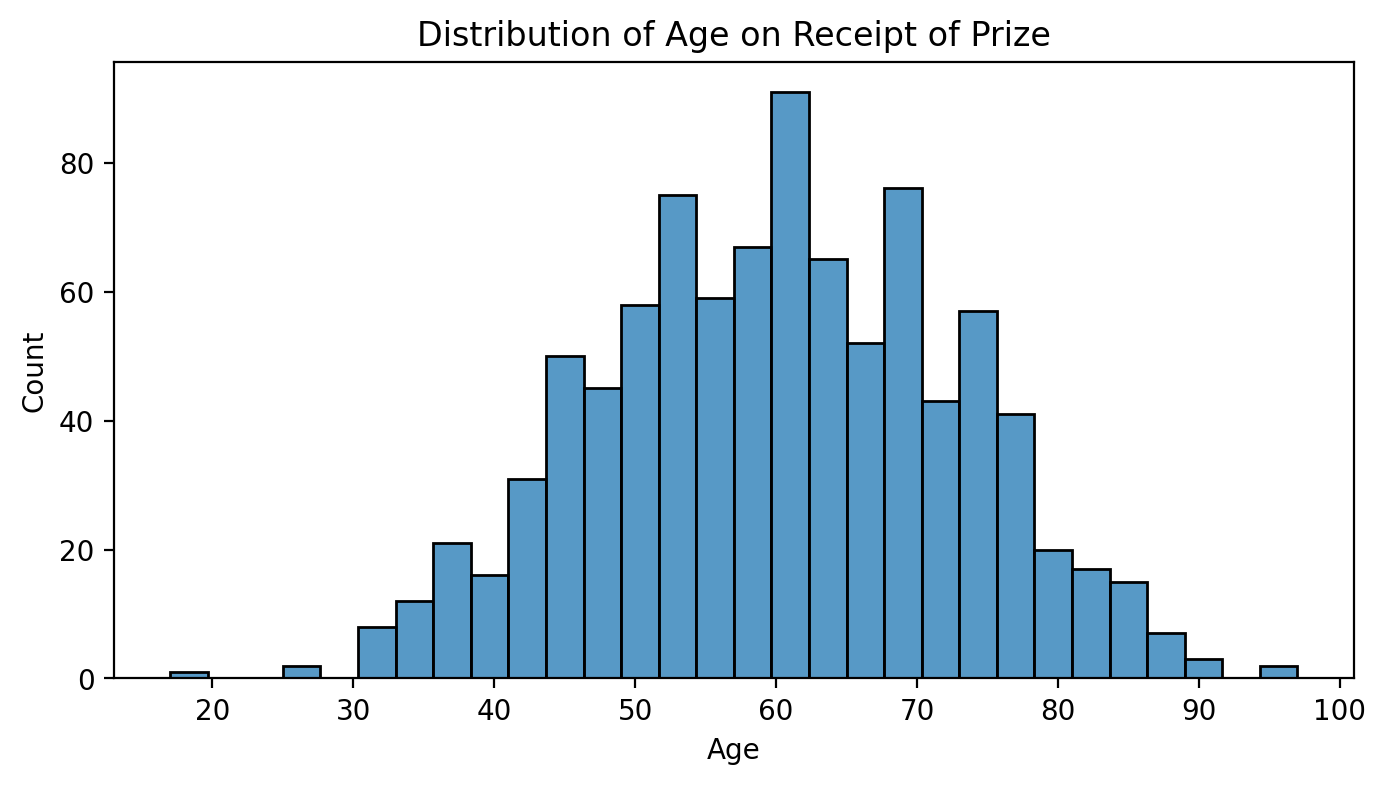

In [90]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


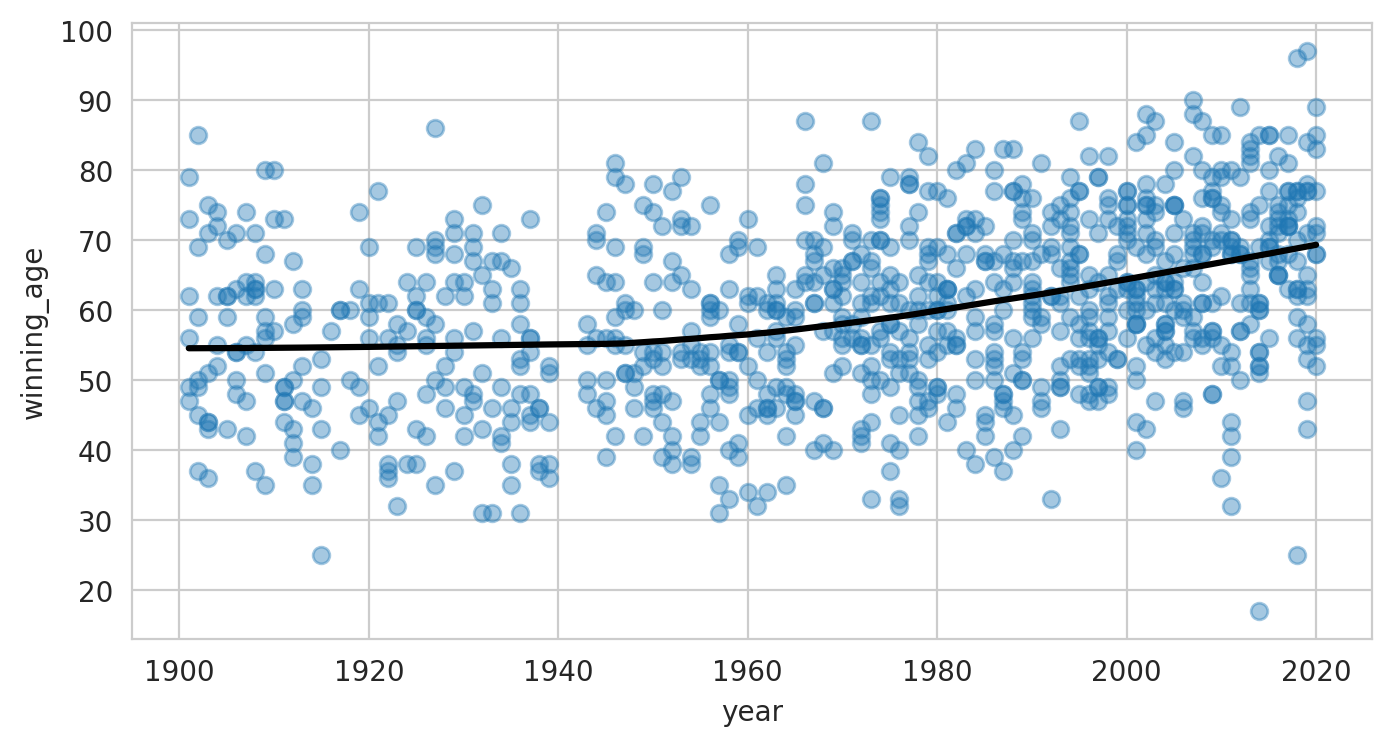

In [91]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

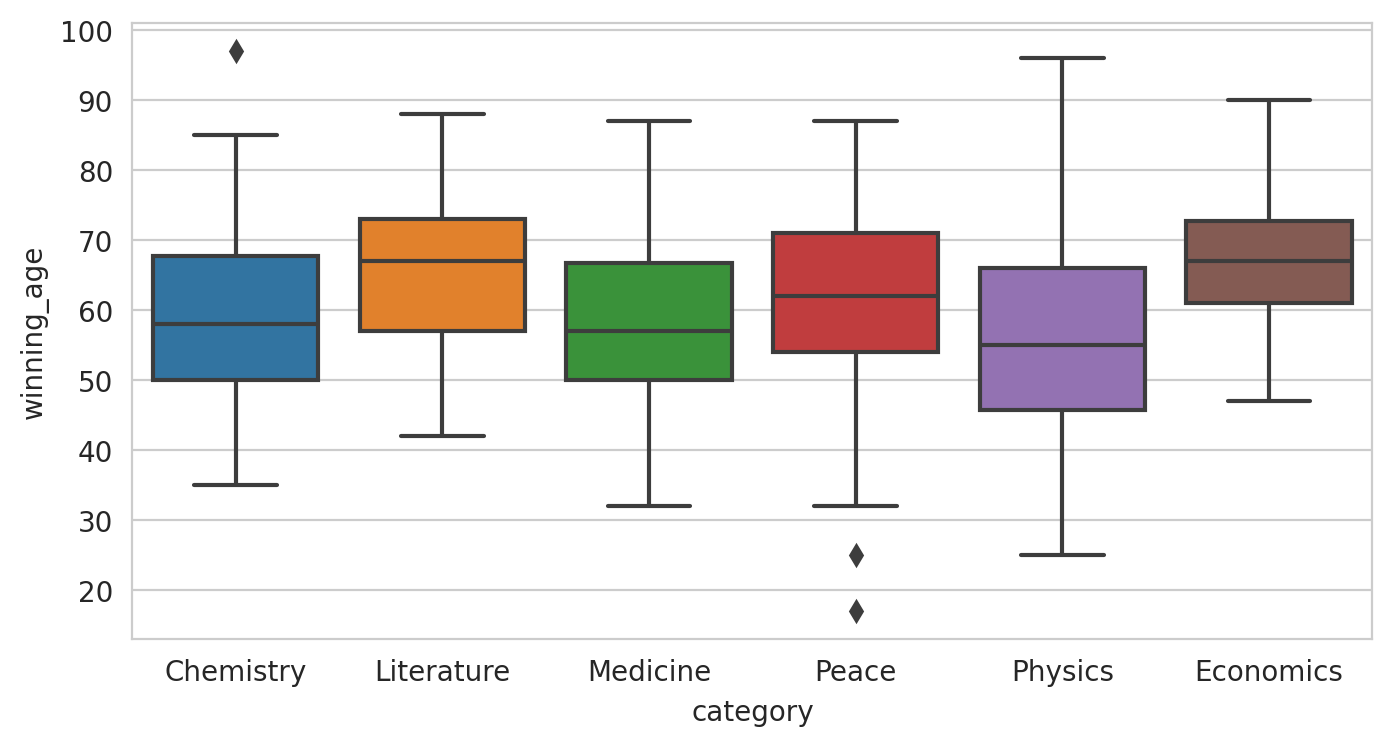

In [92]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


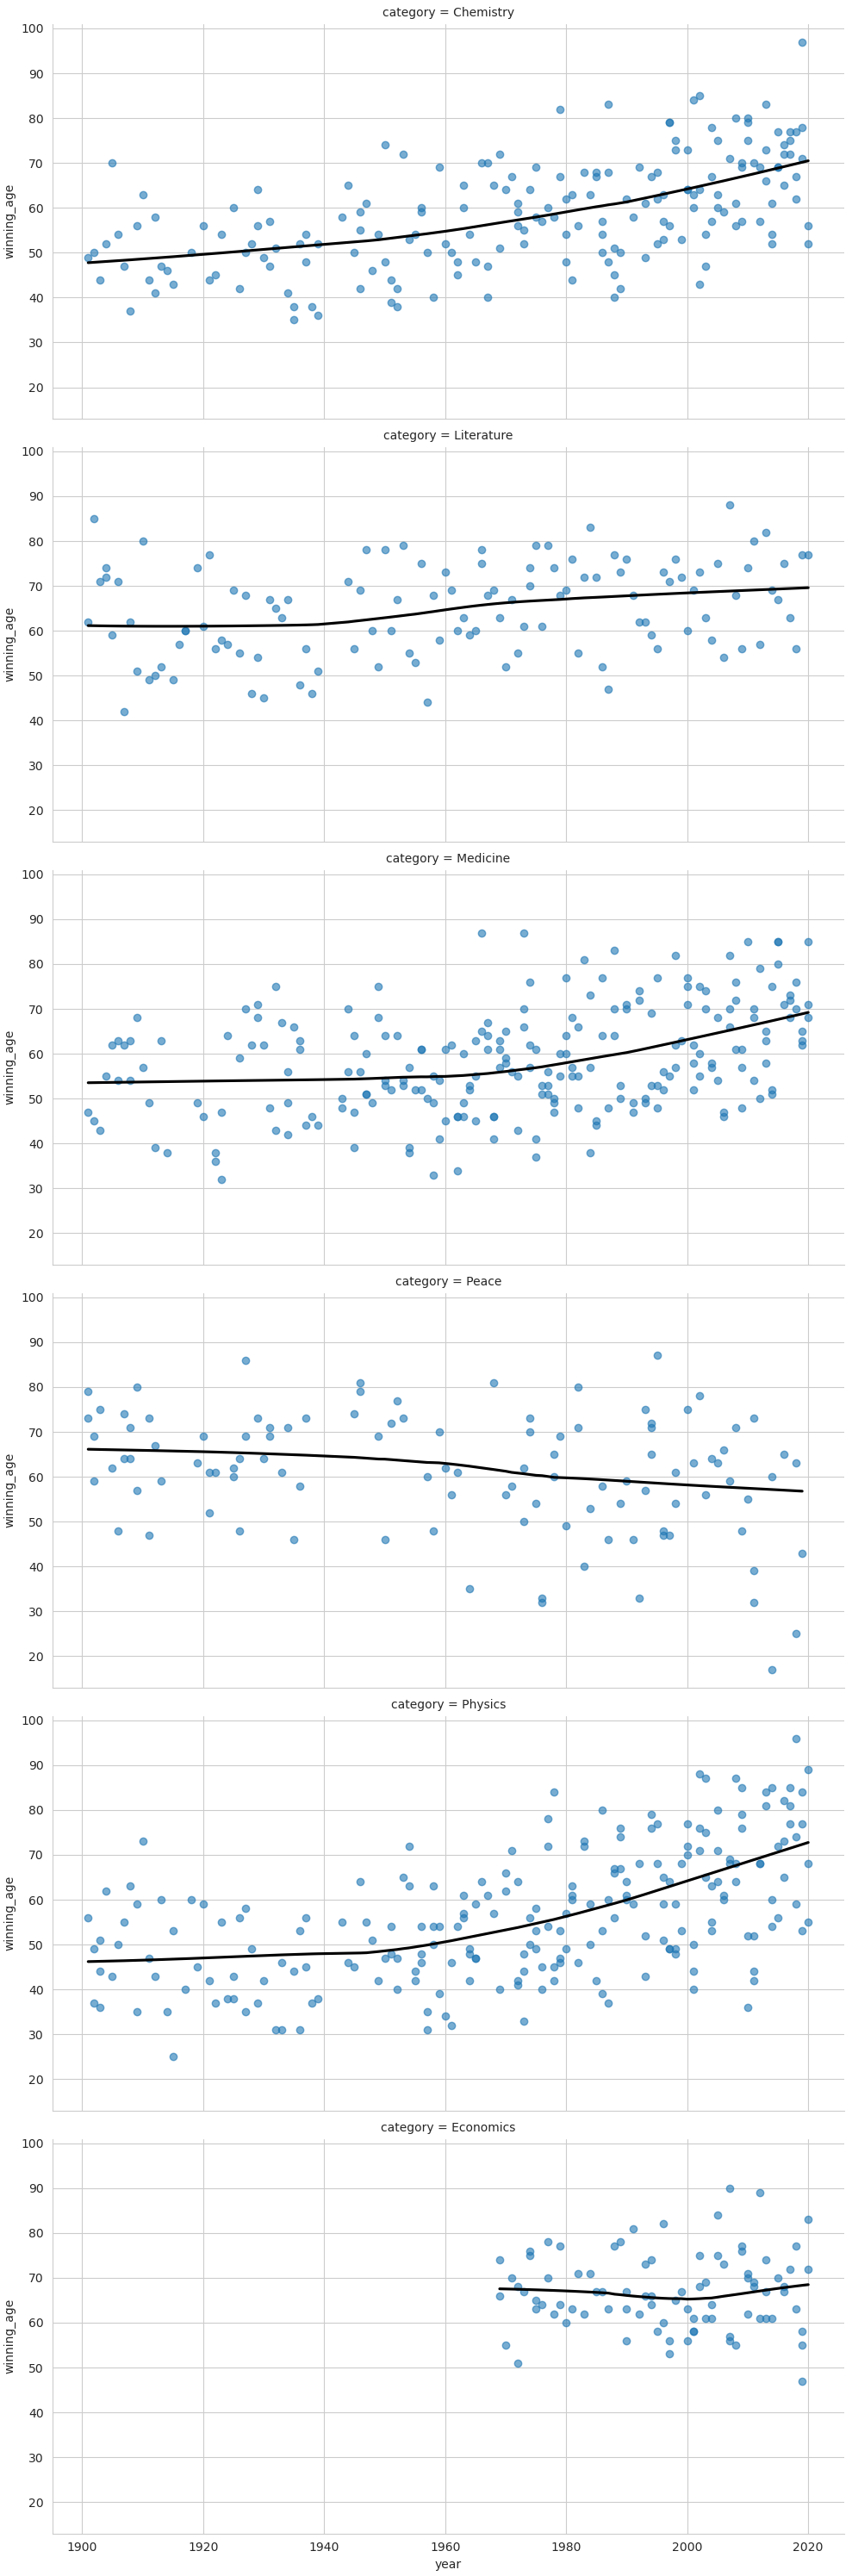

In [93]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()